In [85]:
import numpy as np
import pandas as pd

# Reading dataset and getting information

In [86]:
df = pd.read_csv('sms_spam.csv')

In [87]:
df.sample(5)

,type,text
2457,ham,Onum ela pa. Normal than.
3357,ham,Ok not a problem will get them a taxi. C ing ...
4340,ham,Just got outta class gonna go gym.
3257,ham,Who were those people ? Were you in a tour ? I...
882,ham,"see, i knew giving you a break a few times wou..."


In [88]:
df.shape

(5574, 2)

## 1. Data Cleaning

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [90]:
from sklearn.preprocessing  import LabelEncoder
encoder = LabelEncoder()

In [91]:
df['type'] = encoder.fit_transform(df['type'])  #converting ham and spam to number

In [92]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
# missing values
df.isnull().sum()

type    0
text    0
dtype: int64

In [94]:
# check for duplicate values
df.duplicated().sum()

414

In [95]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [96]:
df.duplicated().sum()

0

In [97]:
df.shape

(5160, 2)

## 2.Exploratory Data Analysis(EDA)

In [98]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [99]:
df['type'].value_counts()

0    4518
1     642
Name: type, dtype: int64

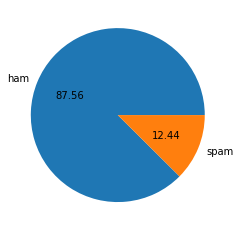

In [100]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [101]:
# Data is imbalanced

In [102]:
import nltk

In [103]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mukesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# finding the number of character and words in sms using word tokenize 

In [104]:
df['num_characters'] = df['text'].apply(len)   

In [105]:
df.head()

,type,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [106]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [107]:
df.head()

,type,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [108]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # sentence tokenize


In [109]:
df.head()

,type,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [110]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5160.000000,5160.000000,5160.000000
mean,79.141085,18.585659,1.951357
std,58.289153,13.396312,1.363466
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [111]:
# ham sms discription
df[df['type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,70.860558,17.287074,1.806109
std,56.584422,13.579444,1.281858
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [112]:
#spam sms discription
df[df['type'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,642.000000,642.000000,642.000000
mean,137.414330,27.724299,2.973520
std,29.975596,7.028380,1.479211
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [113]:
import seaborn as sns

## plotting the data


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

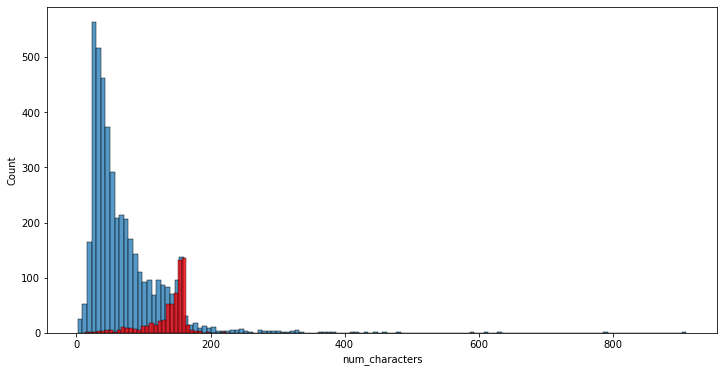

In [114]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type'] == 0]['num_characters'])     
sns.histplot(df[df['type'] == 1]['num_characters'],color='red') #ploting onthe base of characters in sms

<AxesSubplot:xlabel='num_words', ylabel='Count'>

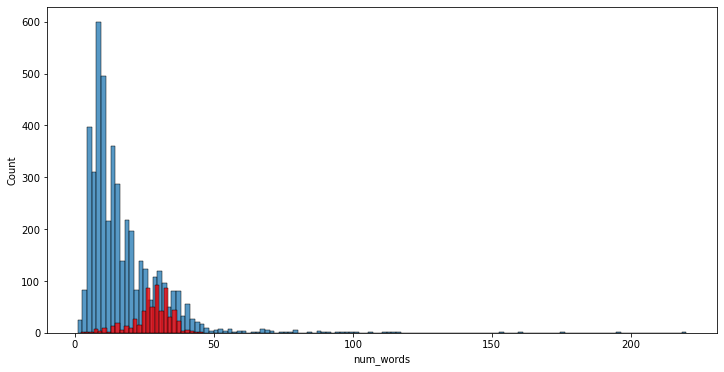

In [115]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['type'] == 0]['num_words'])
sns.histplot(df[df['type'] == 1]['num_words'],color='red') #ploting data on the base of words in the sms

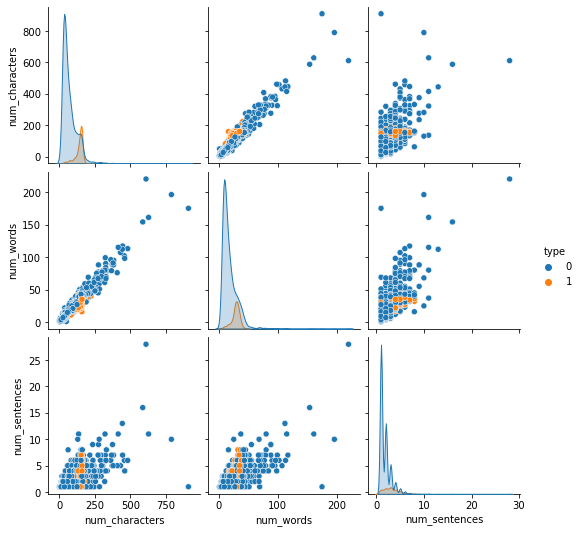

In [116]:
sns.pairplot(df,hue='type')

<AxesSubplot:>

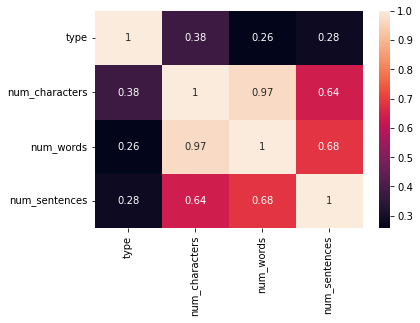

In [117]:
sns.heatmap(df.corr(),annot=True)   #correlation

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [118]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer


In [119]:
ps=PorterStemmer()
ps.stem('dancing')  #stemming

'danc'

In [120]:
def transform_text(text):
    text = text.lower()                    # converting lower case
    text = nltk.word_tokenize(text)        # word tokenize
    
    y = []
    for i in text:                         # removing special characters
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:    # removing punctuation
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))                 # stemming
    
            
    return " ".join(y)

In [121]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [122]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [123]:
df['transformed_text'] = df['text'].apply(transform_text)   # adding transformed text

In [124]:
df.head()

,type,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [125]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white') # using wordcloud to see imp word 

In [126]:
spam_wc = wc.generate(df[df['type'] == 1]['transformed_text'].str.cat(sep=" "))  # for spam

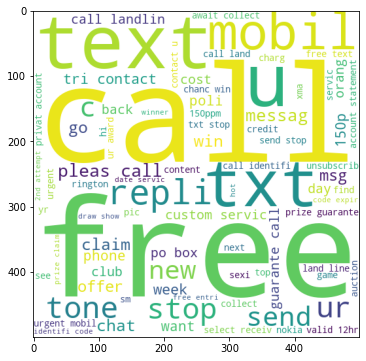

In [127]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [128]:
ham_wc = wc.generate(df[df['type'] == 0]['transformed_text'].str.cat(sep=" "))  # for ham

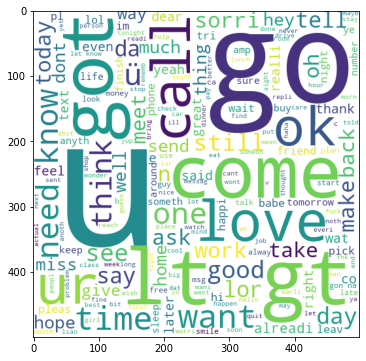

In [129]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [130]:
df.head()

,type,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [131]:
spam_corpus = []
for msg in df[df['type'] == 1]['transformed_text'].tolist():    # finding word from spam
    for word in msg.split():
        spam_corpus.append(word)
        

In [132]:
len(spam_corpus)

9808

## finding most common words use in spam

/home/mukesh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


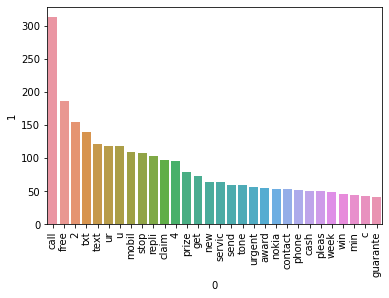

In [133]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## finding most common words for ham

In [134]:
ham_corpus = []
for msg in df[df['type'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [135]:
len(ham_corpus)

35933

/home/mukesh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


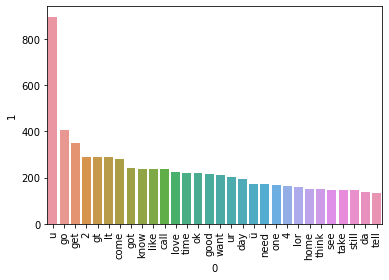

In [136]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [137]:
# Text Vectorization   for converting text sms to number
# using Bag of Words
df.head()

,type,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [138]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [139]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [140]:
X.shape

(5160, 3000)

In [141]:
y = df['type'].values

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

using naive bayes model

In [144]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [145]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [146]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8701550387596899
[[800 116]
 [ 18  98]]
0.45794392523364486


In [147]:
mnb_model=mnb.fit(X_train,y_train)
y_pred2 = mnb_model.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9767441860465116
[[916   0]
 [ 24  92]]
1.0


In [148]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9844961240310077
[[914   2]
 [ 14 102]]
0.9807692307692307


In [149]:
# tfidf --> MNB  sanga ramro result aayo

## Also trying some other models

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [151]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [152]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
    
}

#function to find accuracy and precision for all model

In [153]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [154]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9728682170542635, 0.9489795918367347)

In [155]:
# loop for all models
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9728682170542635
Precision -  0.9489795918367347
For  KN
Accuracy -  0.9263565891472868
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9767441860465116
Precision -  1.0
For  DT
Accuracy -  0.9476744186046512
Precision -  0.8875
For  LR
Accuracy -  0.9515503875968992
Precision -  0.8837209302325582
For  RF
Accuracy -  0.9728682170542635
Precision -  0.9888888888888889
For  AdaBoost
Accuracy -  0.9651162790697675
Precision -  0.8921568627450981
For  BgC
Accuracy -  0.9709302325581395
Precision -  0.9215686274509803
For  ETC
Accuracy -  0.9777131782945736
Precision -  0.9603960396039604
For  GBDT
Accuracy -  0.9534883720930233
Precision -  0.9594594594594594


# model improve
## 1. Change the max_features parameter of TfIdf

In [156]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [157]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [158]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [159]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9786821705426356
Precision 0.97


In [160]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [161]:
from sklearn.ensemble import StackingClassifier

In [162]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [163]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806201550387597
Precision 0.9363636363636364


# Accuracy improve vayna... so i decide to use multinomial naive bayes model which has better accuracy and precision than other

In [164]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb_model,open('model.pkl','wb'))